In [12]:
# Netflix Content Analysis

import pandas as pd

In [13]:
# Reading dataset from csv file

df = pd.read_csv("Netflix_movies_and_tv_shows_clustering.csv")

In [14]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [15]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [16]:
df.shape

(7787, 12)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [18]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [19]:
df['cast'].isnull().sum()

718

In [20]:
df['director'].isnull().sum()

2389

In [21]:
df['country'].isnull().sum()

507

In [36]:
df['cast'].isnull().sum()

718

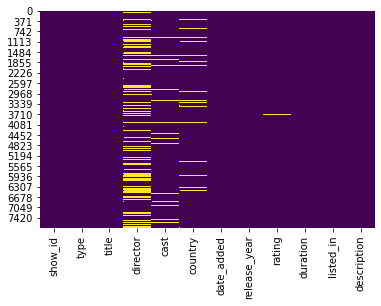

In [23]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")

In [37]:
# Missing values in terms of percentage

df.isnull().mean().round(4)*100

show_id          0.00
type             0.00
title            0.00
director        30.68
cast             9.22
country          0.00
date_added       0.13
release_year     0.00
rating           0.09
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

In [33]:
# Replacing null countries to 'unknown'

df['country'].fillna('Unknown', inplace=True)

In [34]:
### Country-wise Content Contribution

#Before handling missing values, the top 10 countries included only entries with known origin. 
#However, after replacing nulls with 'Unknown', we observed that over 500 titles had no country 
#information — making 'Unknown' the 3rd highest contributor.
#This highlights a significant gap in the dataset's metadata, which could affect any country-based insights.

df['country'].value_counts().head(10)

United States     2555
India              923
Unknown            507
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Name: country, dtype: int64

In [43]:
# Filtering out data with unknown country

unknown_country = df[df['country'] == 'Unknown']
unknown_country

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",Unknown,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
38,s39,TV Show,แผนร้ายนายเจ้าเล่ห์,NaN,"Chutavuth Pattarakampol, Sheranut Yusananda, N...",Unknown,"March 30, 2019",2016,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","When two brothers fall for two sisters, they q..."
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",Unknown,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
97,s98,Movie,3 Deewarein,Nagesh Kukunoor,"Naseeruddin Shah, Jackie Shroff, Juhi Chawla, ...",Unknown,"December 31, 2019",2003,TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...
117,s118,Movie,5 Cowok Jagoan,Anggy Umbara,"Ario Bayu, Arifin Putra, Dwi Sasono, Muhadkly ...",Unknown,"January 5, 2019",2017,TV-MA,106 min,"Action & Adventure, Comedies, International Mo...",Yanto asks his friends to help save a girlfrie...
...,...,...,...,...,...,...,...,...,...,...,...,...
7739,s7740,Movie,Your Excellency,Funke Akindele,"Akin Lewis, Funke Akindele, Kemi Lala Akindoju...",Unknown,"July 10, 2020",2019,TV-G,120 min,"Comedies, International Movies","Bumbling through politics, a billionaire busin..."
7746,s7747,TV Show,دفعة القاهرة,NaN,"Bashar al-Shatti, Fatima Al Safi, Maram Baloch...",Unknown,"April 25, 2020",2019,TV-14,1 Season,"International TV Shows, TV Dramas",A group of women leaves Kuwait to attend unive...
7765,s7766,Movie,Zero Hour,Robert O. Peters,"Richard Mofe-Damijo, Alex Ekubo, Ali Nuhu, Rah...",Unknown,"December 13, 2019",2018,TV-MA,89 min,"International Movies, Thrillers","After his father passes, the heir to a retail ..."
7777,s7778,TV Show,Zombie Dumb,NaN,NaN,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."


In [46]:
# Displaying the type distribution for unknown country

unknown_country['type'].value_counts()

TV Show    277
Movie      230
Name: type, dtype: int64

In [48]:
unknown_country.isnull().mean().round(4)*100

show_id          0.00
type             0.00
title            0.00
director        59.57
cast            18.93
country          0.00
date_added       0.20
release_year     0.00
rating           0.20
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

In [49]:
unknown_country['release_year']

16      2018
38      2016
67      2017
97      2003
117     2017
        ... 
7739    2019
7746    2019
7765    2018
7777    2018
7784    2019
Name: release_year, Length: 507, dtype: int64

In [56]:
# “Director info is missing for ~30% of the dataset, so analyses involving director are performed only on non-null subsets.”

director_df = df[df['director'].notnull()]

In [59]:
director_df.groupby('release_year')

In [61]:
# Top 10 directors

director_df['director'].value_counts().head(10)

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Jay Chapman               12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Quentin Tarantino          8
Name: director, dtype: int64

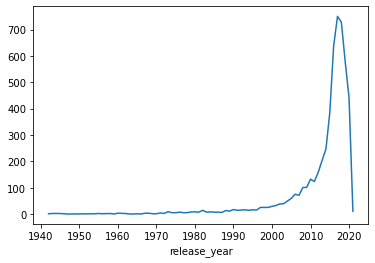

In [66]:
director_df.groupby(['release_year'])['director'].count().plot(kind='line')

In [67]:
director_df.groupby(['type', 'director']).size().sort_values(ascending=False).head(10)

type   director              
Movie  Raúl Campos, Jan Suter    18
       Marcus Raboy              15
       Jay Karas                 14
       Cathy Garcia-Molina       13
       Jay Chapman               12
       Martin Scorsese           12
       Youssef Chahine           12
       Steven Spielberg          10
       David Dhawan               9
       Johnnie To                 8
dtype: int64

In [73]:
director_df.groupby(['type', 'director']).count()

show_id  title  cast  country  \
type    director                                                              
Movie   A. L. Vijay                                 2      2     2        2   
        A. Raajdheep                                1      1     1        1   
        A. Salaam                                   1      1     1        1   
        A.R. Murugadoss                             2      2     2        2   
        Aadish Keluskar                             1      1     1        1   
...                                               ...    ...   ...      ...   
TV Show Vijay S. Bhanushali                         1      1     1        1   
        Vikramaditya Motwane, Anurag Kashyap        1      1     1        1   
        Wouter Bouvijn                              1      1     1        1   
        Yasuhiro Irie                               1      1     1        1   
        Ziad Doueiri                                1      1     1        1   

                                              date_added  release_year  \
type    director                                                         
Movie   A. L. Vijay                                    2             2   
        A. Raajdheep                                   1             1   
        A. Salaam                                      1             1   
        A.R. Murugadoss                                2             2   
        Aadish Keluskar                                1             1   
...                                                  ...           ...   
TV Show Vijay S. Bhanushali                            1             1   
        Vikramaditya Motwane, Anurag Kashyap           1             1   
        Wouter Bouvijn                                 1             1   
        Yasuhiro Irie                                  1             1   
        Ziad Doueiri                                   1             1   

                                              rating  duration  listed_in  \
type    director                                                            
Movie   A. L. Vijay                                2         2          2   
        A. Raajdheep                               1         1          1   
        A. Salaam                                  1         1          1   
        A.R. Murugadoss                            2         2          2   
        Aadish Keluskar                            1         1          1   
...                                              ...       ...        ...   
TV Show Vijay S. Bhanushali                        1         1          1   
        Vikramaditya Motwane, Anurag Kashyap       1         1          1   
        Wouter Bouvijn                             1         1          1   
        Yasuhiro Irie                              1         1          1   
        Ziad Doueiri                               1         1          1   

                                              description  
type    director                                           
Movie   A. L. Vijay                                     2  
        A. Raajdheep                                    1  
        A. Salaam                                       1  
        A.R. Murugadoss                                 2  
        Aadish Keluskar                                 1  
...                                                   ...  
TV Show Vijay S. Bhanushali                             1  
        Vikramaditya Motwane, Anurag Kashyap            1  
        Wouter Bouvijn                                  1  
        Yasuhiro Irie                                   1  
        Ziad Doueiri                                    1  

[4086 rows x 10 columns]

In [76]:
# Entries having no cast or director

df[df['cast'].isnull() & df['director'].isnull()].shape[0]

299

In [ ]:
df[]